In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [9]:
def car (y,t):
    
    v = 0.5
    omega = -0.1
    theta = y[2]

    # model
    dy = np.dot(np.array([[np.cos(theta), 0],
                            [np.sin(theta), 0],
                            [0, 1]]), np.array([[v],[omega]]))
    return dy.flatten()

In [10]:
t = np.linspace(0,20, 100)
y0 = [0,0,0]
out = odeint(car, y0, t)

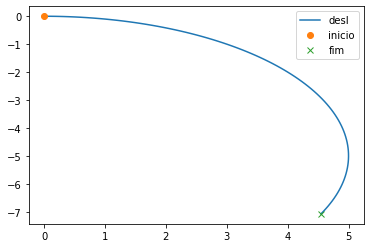

In [11]:
plt.plot(out[:,0], out[:,1])
plt.plot(out[0,0], out[0,1], 'o')
plt.plot(out[-1,0], out[-1,1], 'x')
plt.legend(['desl', 'inicio', 'fim'])

In [12]:
def car (y,t):
    
    v = 0.5
    theta = y[2]
    if y[0] > 0:
        omega = 0.2*np.pi
    else:
        omega = -0.2*np.pi
    
    # model
    dy = np.dot(np.array([[np.cos(theta), 0],
                            [np.sin(theta), 0],
                            [0, 1]]), np.array([[v],[omega]]))
    return dy.flatten()

In [13]:
t = np.linspace(0,20, 100)
y0 = [0,0,0]
out = odeint(car, y0, t)

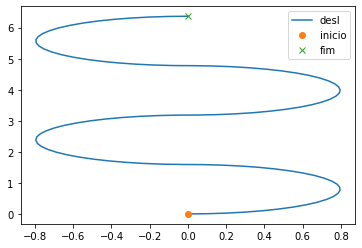

In [14]:
plt.plot(out[:,0], out[:,1])
plt.plot(out[0,0], out[0,1], 'o')
plt.plot(out[-1,0], out[-1,1], 'x')
plt.legend(['desl', 'inicio', 'fim'])

In [40]:
global task
task = 0
def car_controller (y,t):
    global task
    theta = y[2]
    if task == 0:
        posRef = [-2,-2]
    else:
        posRef = [2,2]

    phi = np.arctan2(posRef[1]-y[1],posRef[0]-y[0] )
    Ref = np.array([posRef[0], posRef[1], phi])
    e =  Ref - y
    
    if np.sqrt(e[0]**2 + e[1]**2) < 0.01:
        task = 1

    v = 0.3*np.sqrt(e[0]**2 + e[1]**2)
    alpha = 0.2*e[2]
    omega = v/0.1*np.tan(alpha)
    
    # Physical constraints
    if abs(alpha)> np.pi/4:
        np.pi/4*np.sign(alpha)
    if abs(v)>0.8:
        v = 0.8*np.sign(v)

    # model
    dy = np.dot(np.array([[np.cos(theta), 0],
                            [np.sin(theta), 0],
                            [0, 1]]), np.array([[v],[omega]]))
    return dy.flatten()

In [41]:
t = np.linspace(0,30, 1000)
y0 = [1,0,np.pi]
out = odeint(car_controller, y0, t)

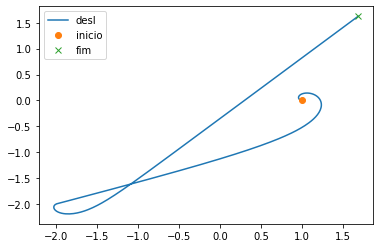

In [42]:
plt.plot(out[:,0], out[:,1])
plt.plot(out[0,0], out[0,1], 'o')
plt.plot(out[-1,0], out[-1,1], 'x')
plt.legend(['desl', 'inicio', 'fim'])

In [105]:
task

1